<a href="https://colab.research.google.com/github/oektomo/KelasRLG2/blob/master/annTutorialLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create the data input, data output and simple system with linear function

In [2]:
Fs = 201
x1 = np.outer(np.linspace(-10., 10., Fs), np.ones(Fs))
x2 = np.outer(np.linspace(-10., 10., Fs), np.ones(Fs))
x2 = x2.T

Here we create simple linear function. 

$f(x_1, x_2) = 0.0005(5x_1 + 2x_2)-0.5$

This will be our system we wan't to predict using ANN.

In [3]:
fx = 0.005* (5*x1 + 2*x2)-0.5
fxflaten = fx.flatten()
fxreshape = np.reshape(fxflaten, (Fs, Fs))

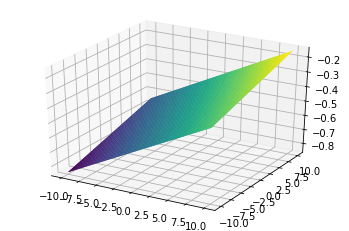

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')
ax.plot_surface(x1, x2, fxreshape,cmap='viridis', edgecolor='none')

In [5]:
# don't plot all point in scatter plot to see the data point
import math
plotSample = 11
hop = math.ceil(Fs/plotSample)
x1scatter = x1[0:Fs:hop, 0:Fs:hop]
x2scatter = x2[0:Fs:hop, 0:Fs:hop]
fxscatter = fx[0:Fs:hop, 0:Fs:hop]

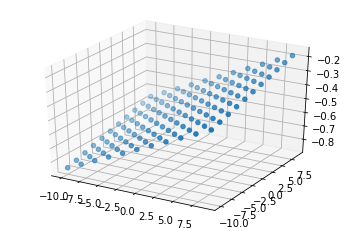

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1scatter, x2scatter, fxscatter)

In [7]:
import tensorflow.keras as keras
from tensorflow.keras.layers import *

# Create the ANN model
In this section we create the ANN model and you can tune the hyperparameter later.

1. input is 2, since we use formula with 2 variable only. More then 2 variable we can't visualize them in 3D space.
2. Only 1 hidden layer with 2 neuron, you can tune this to your need.
3. Hidden layer using sigmoid activation function, you can tune this to your need.
4. Output layer only 1 neuron, since we only use 1 variable output, more than 1, can't visualize in conventional/static 3D space.

In [8]:
#model = keras.Sequential([keras.layers.Dense(units=2, input_shape=[2])])
model = keras.Sequential()
model.add(Dense(2, input_dim=2, activation='linear'))
# model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(50, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
#model.add(Dense(2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
input1 = np.stack([x1.flatten(), x2.flatten()])
X = input1.T
y = fx.flatten()

# First Epoch of training ANN

In [11]:
model.fit(X, y, epochs=1, batch_size=Fs)

201/201 [==============================] - 2s 4ms/step - loss: 0.2033


In [12]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

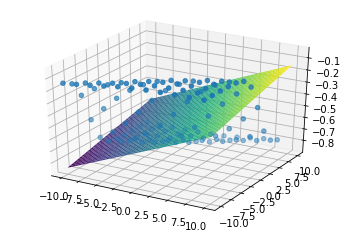

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')

fxscatter_predict1 = y2d_predict[0:Fs:hop, 0:Fs:hop]
ax.scatter(x1scatter, x2scatter, fxscatter_predict1)
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')


# Second Epoch of training ANN

In [14]:
model.fit(X, y, epochs=1, batch_size=Fs)

201/201 [==============================] - 1s 5ms/step - loss: 0.0747


In [15]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

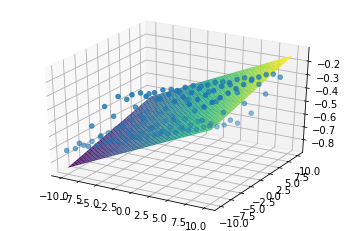

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')

fxscatter_predict2 = y2d_predict[0:Fs:hop, 0:Fs:hop]
ax.scatter(x1scatter, x2scatter, fxscatter_predict2)
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

# Third Epoch of training ANN

In [17]:
model.fit(X, y, epochs=1, batch_size=Fs)

201/201 [==============================] - 0s 2ms/step - loss: 0.0242


In [18]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

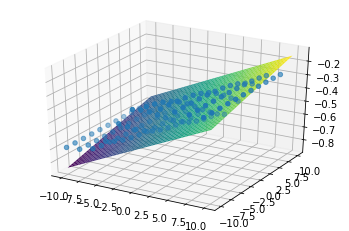

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')

fxscatter_predict3 = y2d_predict[0:Fs:hop, 0:Fs:hop]
ax.scatter(x1scatter, x2scatter, fxscatter_predict3)
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

# 4. Fourth Epoch of training ANN

In [20]:
model.fit(X, y, epochs=1, batch_size=Fs)

201/201 [==============================] - 0s 2ms/step - loss: 0.0117


In [21]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

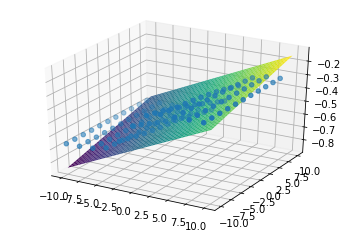

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')

fxscatter_predict4 = y2d_predict[0:Fs:hop, 0:Fs:hop]
ax.scatter(x1scatter, x2scatter, fxscatter_predict4)
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

# 5. Fiveth Epoch of training ANN

In [23]:
model.fit(X, y, epochs=1, batch_size=Fs)

201/201 [==============================] - 0s 2ms/step - loss: 0.0074


In [24]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

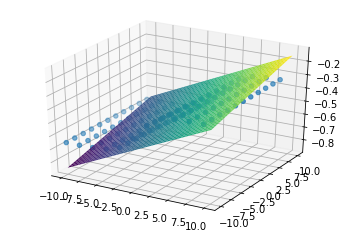

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')

fxscatter_predict5 = y2d_predict[0:Fs:hop, 0:Fs:hop]
ax.scatter(x1scatter, x2scatter, fxscatter_predict5)
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

# 6. Sixth Epoch of training ANN

In [26]:
model.fit(X, y, epochs=1, batch_size=Fs)

201/201 [==============================] - 0s 2ms/step - loss: 0.0052


In [27]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

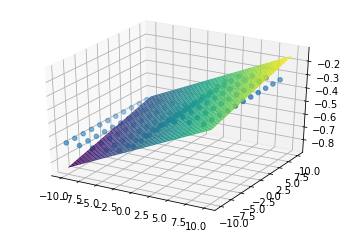

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')

fxscatter_predict6 = y2d_predict[0:Fs:hop, 0:Fs:hop]
ax.scatter(x1scatter, x2scatter, fxscatter_predict6)
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

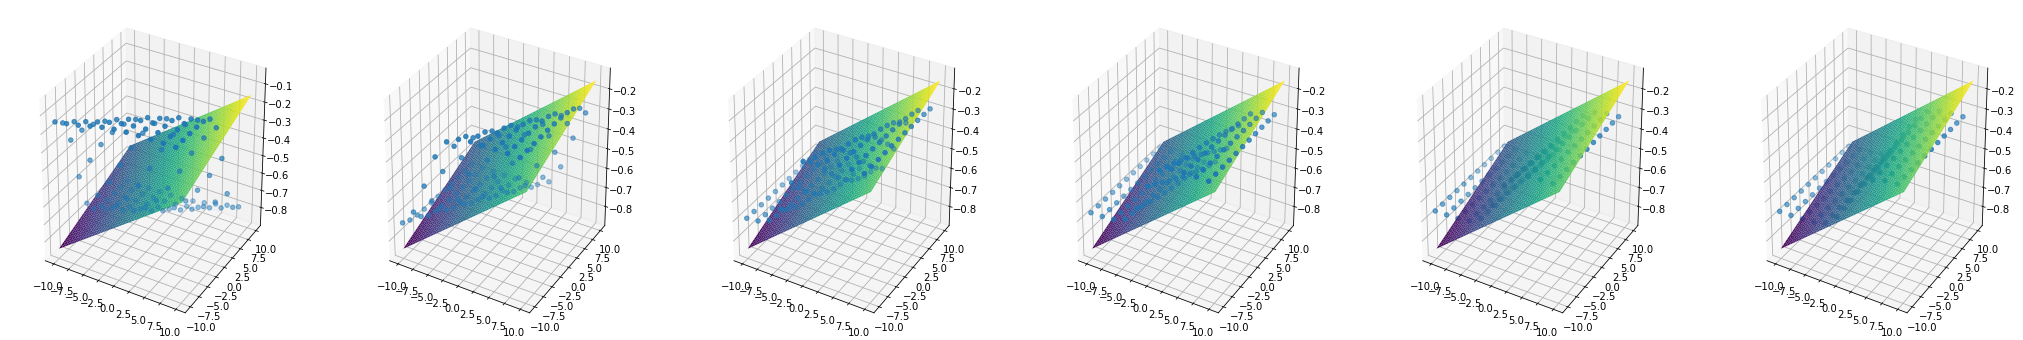

In [29]:
#fig = plt.figure(figsize=plt.figaspect(0.1))
fig = plt.figure(figsize=(36, 6))

ax1 = fig.add_subplot(1, 6, 1, projection='3d')
ax1.scatter(x1scatter, x2scatter, fxscatter_predict1)
ax1.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

ax2 = fig.add_subplot(1, 6, 2, projection='3d')
ax2.scatter(x1scatter, x2scatter, fxscatter_predict2)
ax2.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

ax3 = fig.add_subplot(1, 6, 3, projection='3d')
ax3.scatter(x1scatter, x2scatter, fxscatter_predict3)
ax3.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

ax4 = fig.add_subplot(1, 6, 4, projection='3d')
ax4.scatter(x1scatter, x2scatter, fxscatter_predict4)
ax4.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

ax5 = fig.add_subplot(1, 6, 5, projection='3d')
ax5.scatter(x1scatter, x2scatter, fxscatter_predict5)
ax5.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

ax6 = fig.add_subplot(1, 6, 6, projection='3d')
ax6.scatter(x1scatter, x2scatter, fxscatter_predict6)
ax6.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')

Question:
1. How about we predict number outside the data (bigger or smaller then -10 to 10)?
2. How about we tune the amount of neuron?
3. How about we tune the activation function?